In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
lista_df = []
for i in range(1, 7):
    cadena = "resultados_xgboostNOIMC_h" + str(i) + ".csv"
    df = pd.read_csv(cadena)
    lista_df.append(df)

In [13]:
for i in range(len(lista_df)):
    lista_df[i].columns = lista_df[i].columns.str.strip()


In [15]:
for i, df in enumerate(lista_df):
    print(f"DataFrame {i}: columnas ->", df.columns)

DataFrame 0: columnas -> Index(['date', 'open', 'high', 'low', 'close'], dtype='object')
DataFrame 1: columnas -> Index(['date', 'open', 'high', 'low', 'close'], dtype='object')
DataFrame 2: columnas -> Index(['date', 'open', 'high', 'low', 'close'], dtype='object')
DataFrame 3: columnas -> Index(['date', 'open', 'high', 'low', 'close'], dtype='object')
DataFrame 4: columnas -> Index(['date', 'open', 'high', 'low', 'close'], dtype='object')
DataFrame 5: columnas -> Index(['date', 'open', 'high', 'low', 'close'], dtype='object')


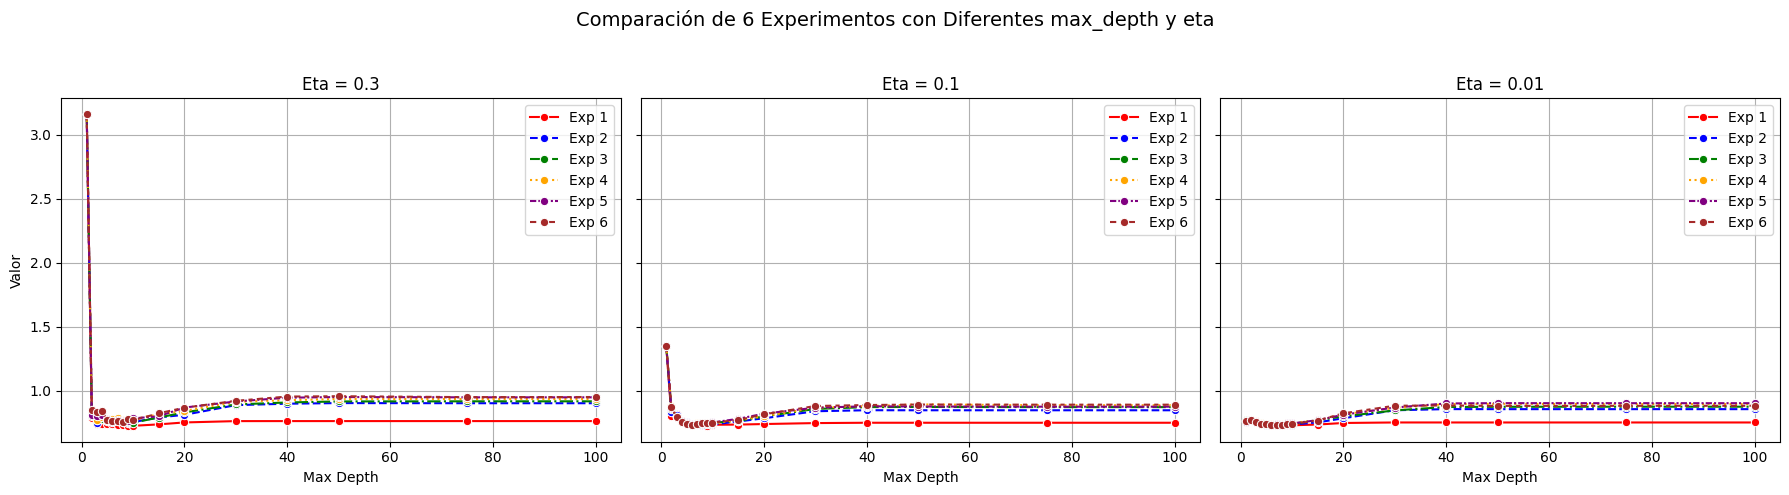

In [18]:
labels = [f"Exp {i+1}" for i in range(6)]

# Crear figuras y ejes
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Colores y estilos para diferenciar cada experimento
estilos = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (3, 2, 2, 2))]
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

# Graficar en los mismos subplots para cada eta
for i, eta in enumerate([0.3, 0.1, 0.01]):
    ax = axes[i]
    ax.set_title(f"Eta = {eta}")
    
    for j, df in enumerate(lista_df):
        df_subset = df[df["eta"] == eta]
        sns.lineplot(data=df_subset, x="max_depth", y="valor", marker="o", ax=ax, 
                     label=labels[j], linestyle=estilos[j], color=colores[j])
    
    ax.set_xlabel("Max Depth")
    if i == 0:
        ax.set_ylabel("Valor")
    ax.legend()
    ax.grid(True)

# Ajustar diseño
plt.suptitle("Comparación de 6 Experimentos con Diferentes max_depth y eta", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar gráfico
plt.show()